# Importing required libraries

In [277]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from datetime import date
import numpy as np
from matplotlib.pyplot import figure
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Reading csv and generating iso-week

In [278]:
df = pd.read_csv('Export Trend.csv',header='infer')



df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')


df['iso_year'] = df['date'].dt.isocalendar().year

df['iso_week'] = df['date'].dt.isocalendar().week

In [279]:
df['iso_date'] = df['iso_year'].astype('str') +'-'+df['iso_week'].astype('str')

# Calculating relative values w.r.t to 2019 for each year

In [280]:
df_2019 = df[df['iso_year'].astype('str')=='2019']

df = pd.merge(df,df_2019,how = 'left',on = 'iso_week',suffixes = ['_original','_2019'])
df



,date_original,Australia_original,New Zealand_original,Belgium_original,Netherlands_original,Luxembourg_original,China_original,Hong Kong_original,Taiwan_original,Bahrain_original,...,Russia_2019,Spain_2019,Switzerland_2019,UK_2019,United States of America_2019,"Australia, NZ, OC_2019",Benelux_2019,Greater China_2019,iso_year_2019,iso_date_2019
0,2019-01-06,75.574651,10.425349,36.674501,35.477400,6.653714,27.904876,9.558411,12.488818,2.271654,...,41.0,52.0,78.0,91.0,68.0,86.000000,78.805616,49.952105,2019,2019-1
1,2019-01-13,70.302001,11.031474,37.591364,34.543784,5.457541,39.971850,8.935036,11.637307,1.489196,...,52.0,55.0,78.0,88.0,68.0,81.333475,77.592689,60.544194,2019,2019-2
2,2019-01-20,70.302001,11.031474,37.132933,31.742937,6.055628,39.971850,8.831141,12.488818,2.069729,...,52.0,52.0,80.0,81.0,67.0,81.333475,74.931497,61.291808,2019,2019-3
3,2019-01-27,70.302001,9.455549,36.216070,31.742937,5.532302,39.217664,7.999975,10.218123,1.994008,...,52.0,56.0,80.0,77.0,64.0,79.757550,73.491309,57.435762,2019,2019-4
4,2019-02-03,74.695876,10.425349,36.674501,32.209745,5.308019,42.988593,7.480496,9.650450,2.044489,...,54.0,61.0,76.0,79.0,66.0,85.121225,74.192266,60.119539,2019,2019-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,2021-11-07,52.726501,4.727775,25.213720,21.473163,2.990433,6.787673,4.986997,3.831796,1.287271,...,33.0,51.0,66.0,69.0,70.0,73.030200,64.884846,70.200120,2019,2019-44
149,2021-11-14,54.484051,4.364100,20.629407,20.539548,2.990433,6.033487,4.467518,3.689878,1.413474,...,39.0,49.0,64.0,71.0,67.0,76.000000,61.874979,57.438262,2019,2019-45
150,2021-11-21,50.090176,4.364100,17.420388,16.338276,2.915673,9.804416,4.259727,4.825225,1.388233,...,36.0,50.0,63.0,68.0,70.0,78.636325,63.285269,65.706456,2019,2019-46
151,2021-11-28,50.968951,4.849000,16.045094,15.871469,2.392347,8.296044,4.986997,5.534817,1.463955,...,36.0,49.0,58.0,64.0,68.0,77.151425,56.508062,69.969949,2019,2019-47


In [281]:
for i in range (0,42):
 df['relative_'+df.iloc[:,1+i].name] =(df.iloc[:,1+i] - df.iloc[:,46+i])/df.iloc[:,1+i]

# Extracting required values

In [282]:

df_final = df. iloc[:, [0,43,44,89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129
]]


In [283]:
df_final.dtypes

date_original                                 datetime64[ns]
iso_week                                              UInt32
iso_date_original                                     object
relative_Australia_original                          float64
relative_New Zealand_original                        float64
relative_Belgium_original                            float64
relative_Netherlands_original                        float64
relative_Luxembourg_original                         float64
relative_China_original                              float64
relative_Hong Kong_original                          float64
relative_Taiwan_original                             float64
relative_Bahrain_original                            float64
relative_Kuwait_original                             float64
relative_Oman_original                               float64
relative_Katar_original                              float64
relative_Saudiarabia_original                        float64
relative_UAE_original   

# Exporting relative value file

In [284]:
df_export_1 = df_final.iloc[:,0:44].transpose()
df_export_1.columns=df_export_1. iloc[0]
df_export_1 = df_export_1.iloc[1:]

In [285]:
df_export_1.to_csv('Relative_changes.csv')

# Extracting maximum date to get present day relative value

In [286]:
max_date = df_final['date_original'].max()

df_latest_date = df_final[df['date_original'].astype('str').str.contains(str(max_date)[0:10])]

# Extracting one month back to latest date to get relative value for one month back

In [287]:
past_date = max_date - relativedelta(months=1)
past_date = str(past_date)[0:7]
past_date

'2021-11'

In [288]:
a = df_final[df['date_original'].astype('str').str.contains(past_date)]
a

,date_original,iso_week,iso_date_original,relative_Australia_original,relative_New Zealand_original,relative_Belgium_original,relative_Netherlands_original,relative_Luxembourg_original,relative_China_original,relative_Hong Kong_original,...,relative_Poland_original,relative_Korea_original,relative_Russia_original,relative_Spain_original,relative_Switzerland_original,relative_UK_original,relative_United States of America_original,"relative_Australia, NZ, OC_original",relative_Benelux_original,relative_Greater China_original
148,2021-11-07,44,2021-44,-0.233333,-0.692308,-0.309091,-0.282609,-0.450000,-6.222222,-0.770833,...,-0.166667,-2.869565,-0.650000,-0.214286,-0.222222,-0.301887,0.000000,-0.271101,-0.306126,-3.498143
149,2021-11-14,45,2021-45,-0.225806,-1.111111,-0.511111,-0.272727,-0.525000,-4.875000,-1.000000,...,-0.333333,-2.040000,-1.166667,-0.166667,-0.306122,-0.420000,0.056338,-0.291459,-0.401174,-3.047547
150,2021-11-21,46,2021-46,-0.385965,-1.111111,-0.815789,-0.685714,-0.410256,-3.461538,-1.024390,...,-0.357143,-2.916667,-0.636364,-0.428571,-0.465116,-0.446809,0.027778,-0.444080,-0.725601,-2.478489
151,2021-11-28,47,2021-47,-0.344828,-0.775000,-0.714286,-0.558824,-0.781250,-4.636364,-0.979167,...,-0.405405,-2.392857,0.454545,-0.289474,-0.487179,-0.560976,-0.046154,-0.382197,-0.647038,-2.718274


In [289]:

max_date = a['date_original'].max()



df_one_month_back = a[a['date_original'].astype('str').str.contains(str(max_date)[0:10])]

In [290]:
df_one_month_back.reset_index(inplace = True)
df_latest_date.reset_index(inplace = True)

# Merging one month back and latest/current relative data

In [291]:
final_table = pd.merge(df_one_month_back, df_latest_date, left_index=True, right_index=True,suffixes=['_one_month_back','_latest'])


In [292]:
final_table.iloc[:,49]


0   -0.274194
Name: relative_Australia_original_latest, dtype: float64

In [293]:
final_table.iloc[:,4]

0   -0.344828
Name: relative_Australia_original_one_month_back, dtype: float64

# Generating difference and exporting csv

In [294]:
for i in range (0,42):
  final_table['difference_'+final_table.iloc[:,49+i].name] = final_table.iloc[:,49+i]-final_table.iloc[:,4+i]

In [295]:

df_export_2 = final_table.iloc[:,4:131].transpose()
df_export_2.columns = ['Values']


In [296]:
df_export_2.to_csv('difference.csv')

In [297]:
df_1 = df_final[df['iso_date_original'].astype('str').str.contains('2020')]
df_1

,date_original,iso_week,iso_date_original,relative_Australia_original,relative_New Zealand_original,relative_Belgium_original,relative_Netherlands_original,relative_Luxembourg_original,relative_China_original,relative_Hong Kong_original,...,relative_Poland_original,relative_Korea_original,relative_Russia_original,relative_Spain_original,relative_Switzerland_original,relative_UK_original,relative_United States of America_original,"relative_Australia, NZ, OC_original",relative_Benelux_original,relative_Greater China_original
52,2020-01-05,1,2020-1,0.044444,0.140000,-0.038961,-0.055556,-0.155844,0.383333,0.021277,...,0.056338,0.098765,0.088889,-0.040000,-0.026316,0.031915,0.227273,0.057144,-0.055442,0.253761
53,2020-01-12,2,2020-2,0.175258,0.042105,0.023810,0.108434,0.051948,0.070175,0.113402,...,0.084507,0.174419,0.037037,0.000000,0.000000,0.120000,0.291667,0.159410,0.065259,0.088283
54,2020-01-19,3,2020-3,0.080460,0.031915,-0.025316,0.139241,-0.173913,0.273973,-0.164384,...,0.095890,0.191011,0.054545,0.000000,-0.025641,0.129032,0.287234,0.074163,0.042438,0.177965
55,2020-01-26,4,2020-4,-0.025641,0.071429,-0.012821,0.028571,-0.233333,-0.857143,-0.350877,...,0.014925,-0.046875,-0.083333,-0.037037,-0.081081,0.094118,0.209877,-0.013086,-0.007837,-0.590048
56,2020-02-02,5,2020-5,-0.118421,-0.036145,0.000000,0.000000,-0.059701,-2.800000,-0.500000,...,-0.015152,-0.064516,-0.173913,-0.033898,-0.041096,0.102273,0.214286,-0.107649,-0.004047,-1.368537
57,2020-02-09,6,2020-6,-0.050000,0.000000,-0.052632,-0.028986,-0.112676,-6.125000,-0.767442,...,-0.015152,-0.436364,-0.108696,-0.016393,-0.171429,0.082353,0.229885,-0.043608,-0.046510,-2.208543
58,2020-02-16,7,2020-7,-0.050633,0.000000,0.052632,-0.030303,-0.045455,-2.285714,-0.866667,...,0.031250,-0.232143,-0.125000,-0.050847,-0.013158,0.047619,0.241758,-0.044022,0.009575,-1.418909
59,2020-02-23,8,2020-8,0.000000,-0.074074,-0.115942,-0.081967,-0.133333,-4.700000,-0.913043,...,-0.071429,-0.436364,-0.261905,-0.084746,-0.316667,0.063291,0.241758,-0.009078,-0.102172,-1.922217
60,2020-03-01,9,2020-9,-0.333333,-0.175676,-0.271186,-0.166667,-0.641026,-1.190476,-1.204545,...,-0.134615,-0.444444,-0.314286,-0.156863,-0.388889,-0.056338,0.136364,-0.312215,-0.242976,-0.994364
61,2020-03-08,10,2020-10,-0.315789,-0.271186,-0.750000,-0.466667,-1.333333,-1.812500,-1.153846,...,-0.628571,-0.688889,-1.068966,-0.909091,-0.659091,-0.158730,0.075000,-0.310216,-0.643057,-1.375827


In [298]:
df_2 = df_final[df['iso_date_original'].astype('str').str.contains('2021')]
df_2

,date_original,iso_week,iso_date_original,relative_Australia_original,relative_New Zealand_original,relative_Belgium_original,relative_Netherlands_original,relative_Luxembourg_original,relative_China_original,relative_Hong Kong_original,...,relative_Poland_original,relative_Korea_original,relative_Russia_original,relative_Spain_original,relative_Switzerland_original,relative_UK_original,relative_United States of America_original,"relative_Australia, NZ, OC_original",relative_Benelux_original,relative_Greater China_original
105,2021-01-10,1,2021-1,-0.563636,-0.535714,-2.200000,-2.304348,-2.423077,-2.363636,-2.172414,...,-2.045455,-2.650000,-1.733333,-3.000000,-1.166667,-2.640000,-0.079365,-0.560198,-2.264369,-2.151471
106,2021-01-17,2,2021-2,-0.403509,-0.421875,-2.280000,-2.217391,-1.433333,-4.888889,-1.529412,...,-1.954545,-2.550000,-2.058824,-3.230769,-1.166667,-2.259259,-0.133333,-0.405972,-2.174799,-3.113169
107,2021-01-24,3,2021-3,-0.481481,-0.318841,-2.521739,-1.833333,-1.892857,-2.785714,-1.741935,...,-1.869565,-2.428571,-1.600000,-3.333333,-0.904762,-2.375000,-0.098361,-0.457109,-2.143019,-2.508554
108,2021-01-31,4,2021-4,-0.538462,-0.278689,-1.724138,-1.428571,-1.960000,-4.200000,-1.026316,...,-1.275862,-2.526316,-1.600000,-3.307692,-0.739130,-2.347826,0.015385,-0.502279,-1.602923,-2.714253
109,2021-02-07,5,2021-5,-0.440678,-0.409836,-1.666667,-1.379310,-1.290323,-2.352941,-0.714286,...,-0.595238,-1.640000,-1.700000,-3.066667,-0.381818,-1.468750,0.214286,-0.436828,-1.505822,-1.731464
110,2021-02-14,6,2021-6,-0.448276,-0.349206,-1.580645,-0.868421,-1.135135,-1.850000,-0.727273,...,-0.634146,-2.291667,-1.428571,-2.875000,-0.413793,-1.294118,0.294737,-0.435366,-1.181227,-1.476387
111,2021-02-21,7,2021-7,-0.431034,-0.622642,-1.571429,-0.888889,-1.379310,-3.181818,-1.270270,...,-0.631579,-2.000000,-1.250000,-2.647059,-0.452830,-1.352941,0.103896,-0.452484,-1.197743,-2.290585
112,2021-02-28,8,2021-8,-0.290323,-1.121951,-1.961538,-1.129032,-1.615385,-4.700000,-1.095238,...,-0.764706,-2.160000,-1.208333,-2.555556,-0.717391,-1.466667,0.092105,-0.359845,-1.512606,-2.829887
113,2021-03-07,9,2021-9,-0.466667,-0.581818,-1.777778,-0.852941,-1.206897,-1.705882,-1.552632,...,-0.787879,-1.228571,-0.840000,-1.809524,-0.595745,-1.343750,0.061728,-0.479593,-1.254513,-1.756910
114,2021-03-14,10,2021-10,-0.315789,-0.271186,-1.961538,-0.941176,-0.842105,-2.214286,-1.210526,...,-1.280000,-0.652174,-1.000000,-1.739130,-0.351852,-1.085714,0.139535,-0.310216,-1.329026,-1.853032


In [299]:
x1 = df_1['iso_week'].values
x1 = x1.astype('int')

y = []
for i in range (0,41):
  y.append(df_1.iloc[:,3+i].values)
y[40]

array([ 0.25376119,  0.08828338,  0.17796537, -0.59004761, -1.36853714,
       -2.20854338, -1.41890866, -1.92221659, -0.99436366, -1.37582747,
       -3.45715763, -2.01394906, -2.59371692, -2.24401849, -4.9725999 ,
       -2.40338958, -3.35728463, -4.24075918, -2.96913649, -2.58147887,
       -1.78436496, -2.2034679 , -2.19023792, -2.69871627, -2.14549853,
       -4.45781026, -3.81517704, -2.10378069, -2.79010367, -2.96101917,
       -1.96893383, -2.97199346, -2.29192259, -2.47851485, -1.90642144,
       -2.4874853 , -2.21655103, -3.78512604, -1.38340276, -0.78621328,
       -1.8484127 , -2.68564595, -2.28551896, -3.62830422, -1.44575376,
       -2.3218909 , -2.33031538, -2.96945208, -3.2931529 , -2.33441148,
       -1.43967235, -2.25856951,         nan])

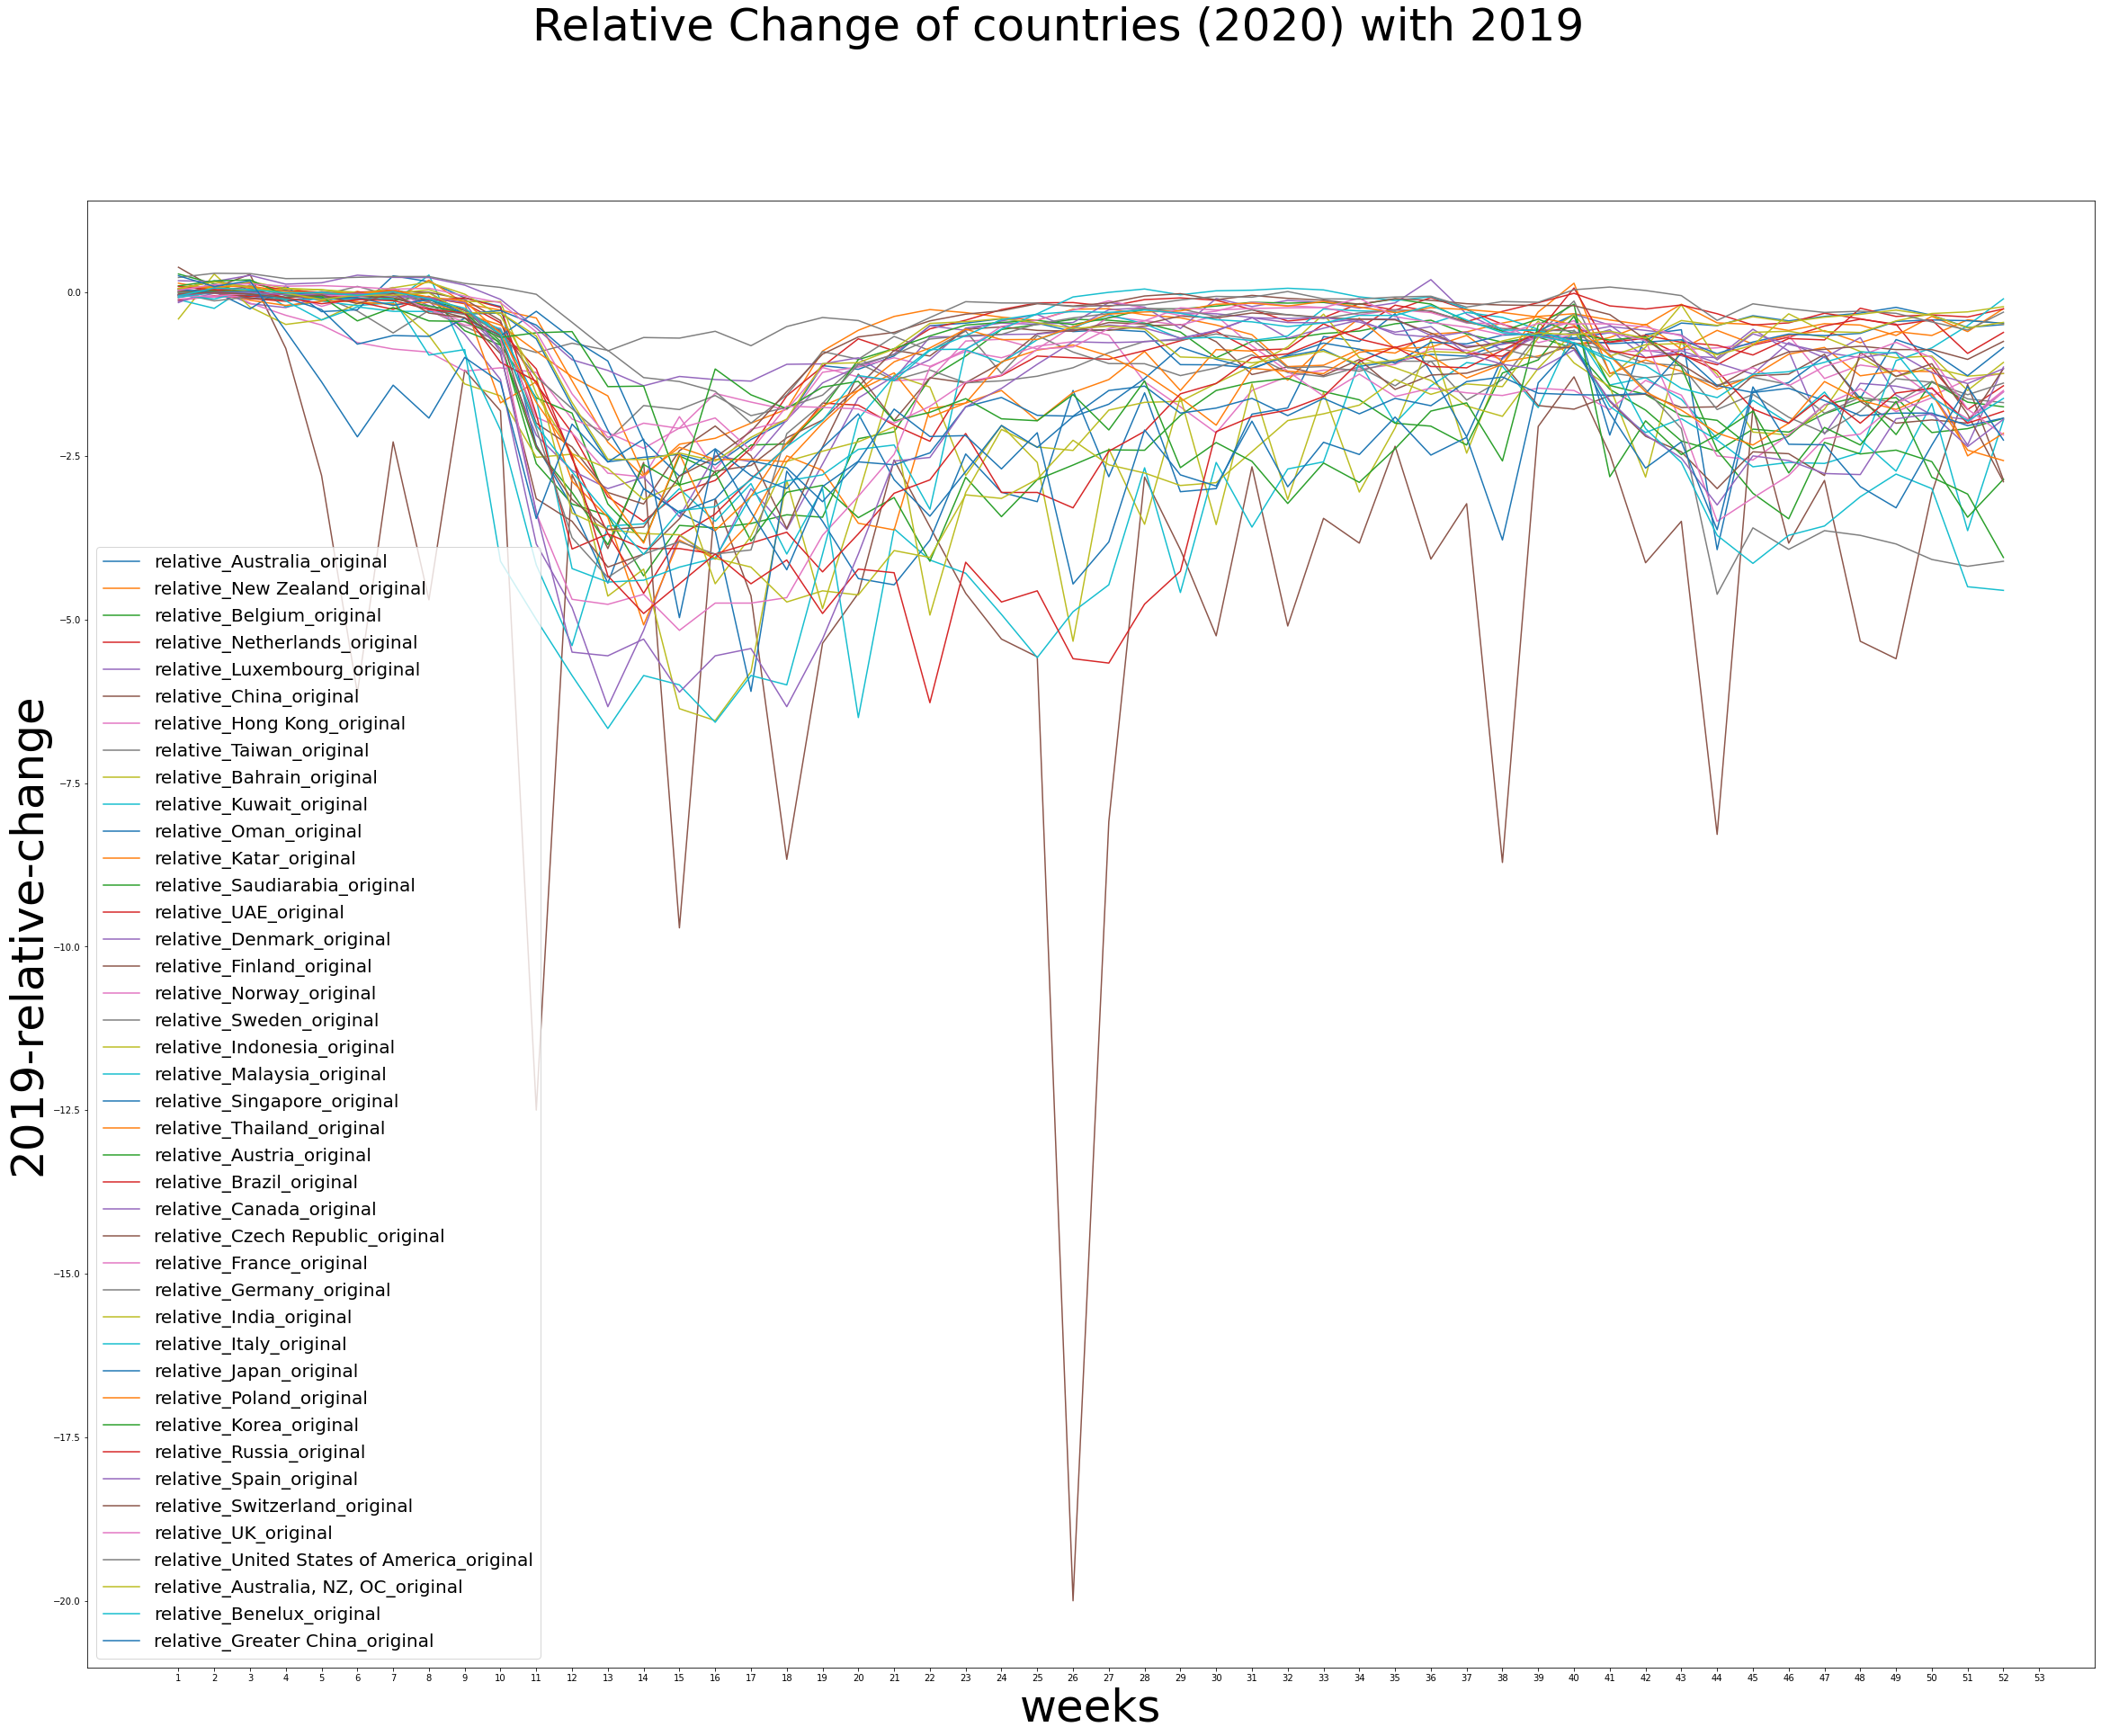

In [300]:


plt.figure(figsize=(40, 30))
plt.xticks(x1)
for i in range (0,41):
 y1=  y[i]
 y1 = y1.astype('float')
 plt.plot(x1,y1, label = df_2.iloc[:,3+i].name )

plt.legend(prop={'size': 20})
plt.suptitle("Relative Change of countries (2020) with 2019", fontsize=50)
plt.xlabel("weeks")
plt.ylabel("2019-relative-change")
axes = plt.gca()
axes.xaxis.label.set_size(50)
axes.yaxis.label.set_size(50)
plt.show()

In [301]:
x1 = df_2['iso_week'].values
x1 = x1.astype('int')

y = []
for i in range (0,41):
  y.append(df_2.iloc[:,3+i].values)
y[40]

array([-2.15147086, -3.11316876, -2.50855432, -2.71425253, -1.73146389,
       -1.47638706, -2.29058498, -2.82988667, -1.75690955, -1.85303162,
       -2.50144859, -2.2961828 , -2.79605078, -2.61352133, -2.82157728,
       -2.00949604, -2.64598799, -2.11396619, -3.29986525, -3.02105916,
       -2.17163119, -2.31826106, -2.7448037 , -3.32018397, -1.69556193,
       -3.37939604, -3.98540517, -2.43877457, -3.64218332, -2.3380034 ,
       -2.94879713, -3.25383347, -2.03601807, -2.58191661, -3.25459353,
       -2.7996247 , -1.88219392, -3.47237979, -2.01379527, -2.51690802,
       -2.01254843, -3.4306305 , -3.64296683, -3.49814326, -3.04754677,
       -2.47848892, -2.71827376, -2.5608613 ])

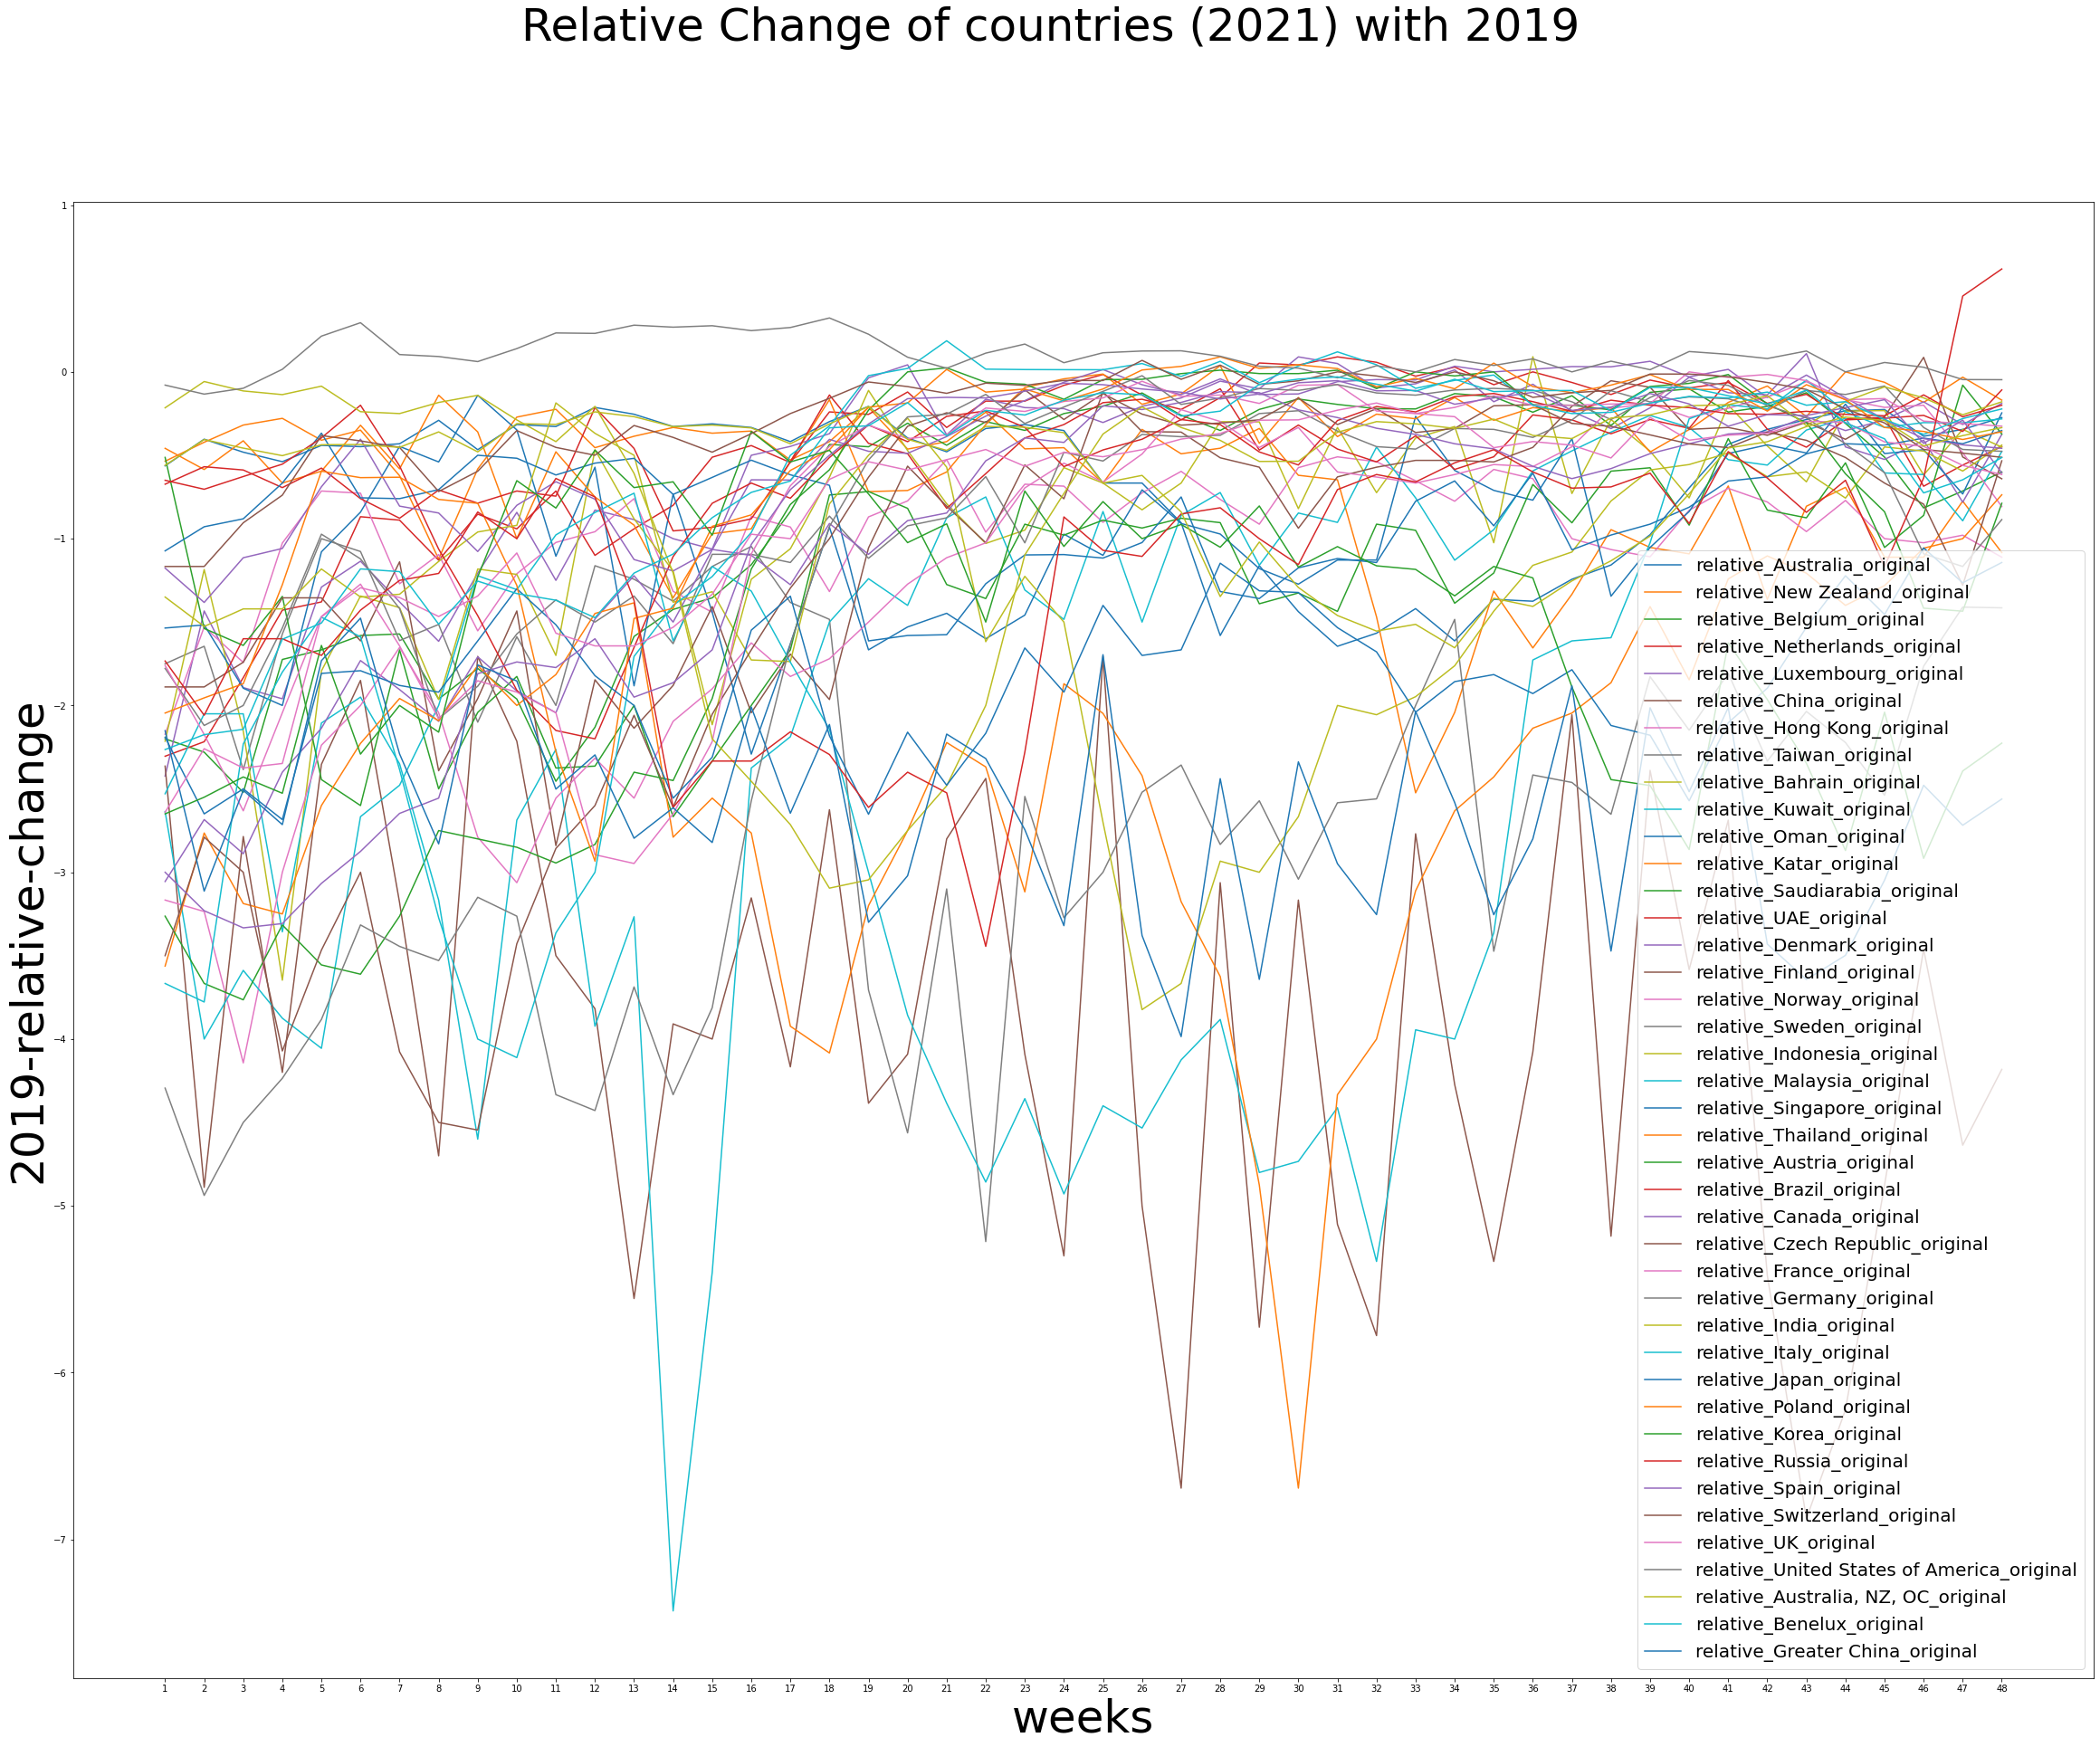

In [302]:


plt.figure(figsize=(40, 30))
plt.xticks(x1)
for i in range (0,41):
 y1=  y[i]
 y1 = y1.astype('float')
 plt.plot(x1,y1, label = df_2.iloc[:,3+i].name )

plt.legend(prop={'size': 20})
plt.suptitle("Relative Change of countries (2021) with 2019", fontsize=50)
plt.xlabel("weeks")
plt.ylabel("2019-relative-change")
axes = plt.gca()
axes.xaxis.label.set_size(50)
axes.yaxis.label.set_size(50)
plt.show()